In [299]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-advancement.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

seasons = [11,12,13,14]
# seasons = [11]
df = df[df['season'].isin(seasons)]

# 'rolls' is a list of 3 rolls (None if no 3rd roll). Split into three columns
df['roll'] = df['roll'].apply(lambda x: x[1:-1].split(','))
splitrolls = pd.DataFrame(df['roll'].to_list(), columns = ['roll1','roll2'], index = df.index)
df[['roll1','roll2']] = splitrolls
df[['roll1','roll2']] = df[['roll1','roll2']].apply(pd.to_numeric)

print(df.loc[~df["runner_on_first_name"].isnull()]["runner_on_first_name"])
len(df)

Series([], Name: runner_on_first_name, dtype: float64)


1557

In [300]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0
df.loc[df["runner_on_second_mods"].astype(str).str.contains("SCATTERED"), "runner_on_second_vibes"] = 0
df.loc[df["runner_on_third_mods"].astype(str).str.contains("SCATTERED"), "runner_on_third_vibes"] = 0


df['batter_inv_patheticism'] = 1-df['batter_patheticism']/df["batter_multiplier"]
df['batter_inv_patheticism_with_vibe'] = df['batter_inv_patheticism'] * (1 + 0.2*df['batter_vibes'])
df['batter_inv_tragicness'] = 1-df['batter_tragicness']/df["batter_multiplier"]
df['batter_inv_tragicness_with_vibe'] = df['batter_inv_tragicness'] * (1 + 0.2*df['batter_vibes'])
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])

for attr in [
    "runner_on_first_base_thirst",
    "runner_on_first_continuation",
    "runner_on_first_ground_friction",
    "runner_on_first_indulgence",
    "runner_on_first_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_first_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
for attr in [
    "runner_on_second_base_thirst",
    "runner_on_second_continuation",
    "runner_on_second_ground_friction",
    "runner_on_second_indulgence",
    "runner_on_second_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_second_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_second_vibes"])
for attr in [
    "runner_on_third_base_thirst",
    "runner_on_third_continuation",
    "runner_on_third_ground_friction",
    "runner_on_third_indulgence",
    "runner_on_third_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_third_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_third_vibes"])

for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

len(df)

/tmp/ipykernel_17699/2290267732.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_17699/2290267732.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_17699/2290267732.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

1557

In [301]:
dfc = df.copy()

# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_second_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_third_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# If there is no baserunner, override multiplier to 1 to avoid discarding
dfc.loc[dfc["runner_on_first_name"].isnull(), "runner_on_first_multiplier"] = 1
dfc.loc[dfc["runner_on_second_name"].isnull(), "runner_on_second_multiplier"] = 1
dfc.loc[dfc["runner_on_third_name"].isnull(), "runner_on_third_multiplier"] = 1
# print(dfc.loc[dfc["runner_on_first_name"].isnull()]["runner_on_first_multiplier"])

dfc = dfc[
    (dfc["pitcher_multiplier"] == 1)
    & (dfc["batter_multiplier"] == 1)
    & (dfc["fielder_multiplier"] == 1)
    & (dfc["runner_on_first_multiplier"] == 1)
    & (dfc["runner_on_second_multiplier"] == 1)
    & (dfc["runner_on_third_multiplier"] == 1)
]

# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

print(len(dfc))

907


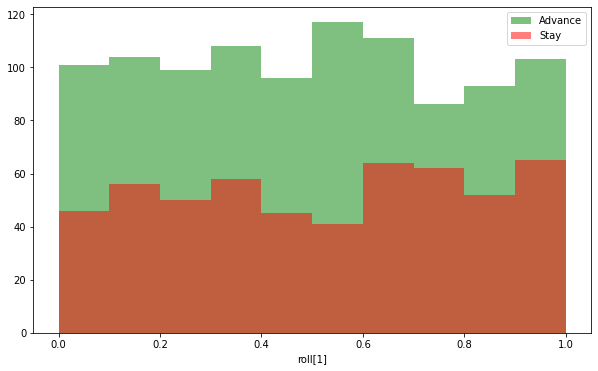

In [302]:
# This shows the first roll is uncorrelated to whether the runner advances
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df[df['passed']]['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="Advance",
    alpha = 0.5
)
ax.hist(
    df[~df['passed']]['roll1'],
    bins=10,
    range=[0.,1.],
    color="red",
    label="Stay",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[1]")

ax.legend()

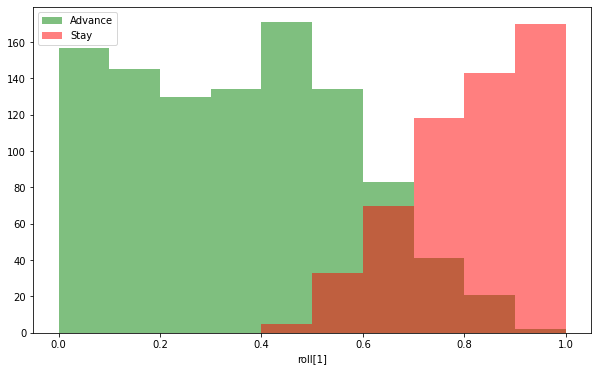

In [303]:
# This shows the second roll is related to whether the runner advances
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df[df['passed']]['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="Advance",
    alpha = 0.5
)
ax.hist(
    df[~df['passed']]['roll2'],
    bins=10,
    range=[0.,1.],
    color="red",
    label="Stay",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[1]")

ax.legend()

In [332]:
X = dfc[
    [
        "roll2",
        "passed",
        # "batter_patheticism_with_vibe",
        # "batter_tragicness_with_vibe",
        # "batter_inv_tragicness",
        # "pitcher_shakespearianism_with_vibe",
        # 'fielder_anticapitalism_with_vibe',
        # 'fielder_chasiness_with_vibe',
        # 'fielder_omniscience_with_vibe',
        'fielder_tenaciousness_with_vibe',
        # 'fielder_watchfulness_with_vibe',
        # 'ballpark_grandiosity',
        # 'ballpark_fortification',
        # 'ballpark_obtuseness',
        # 'ballpark_ominousness',
        # 'ballpark_inconvenience',
        # 'ballpark_viscosity',
        # 'ballpark_forwardness',
        # 'ballpark_mysticism',
        # 'ballpark_elongation',
        # 'runner_on_second_base_thirst_with_vibe',
        # 'runner_on_second_laserlikeness_with_vibe',
        # 'runner_on_second_continuation_with_vibe',
        # 'runner_on_second_ground_friction_with_vibe',
        'runner_on_second_indulgence_with_vibe',
        # 'ballpark_grandiosity',
        # 'ballpark_fortification',
        # 'ballpark_obtuseness',
        # 'ballpark_ominousness',
        # 'ballpark_inconvenience',
        # 'ballpark_viscosity',
        # 'ballpark_forwardness',
        # 'ballpark_mysticism',
        'ballpark_elongation',
        #'ballpark_filthiness',
    ]
]

# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]

# Test out a specific coefficient
# X["roll1"] = X["roll1"]-0.4*X["pitcher_shakespearianism_with_vibe"]
# X.drop("pitcher_shakespearianism_with_vibe", axis="columns", inplace=True)
# X["roll1"] = X["roll1"]-0.1*X["fielder_tenaciousness_with_vibe"]
# X.drop("fielder_tenaciousness_with_vibe", axis="columns", inplace=True)
y = X["passed"]
X = X.drop("passed", axis=1)
X

,roll2,fielder_tenaciousness_with_vibe,runner_on_second_indulgence_with_vibe,ballpark_elongation
0,0.634046,0.326338,0.515180,0.500000
2,0.939905,1.435261,0.519916,0.500000
3,0.526198,0.334315,1.107111,0.500000
4,0.866923,0.142905,1.050049,0.500000
6,0.098789,0.451276,0.447203,0.500000
...,...,...,...,...
1543,0.482388,0.560314,0.533151,0.540903
1545,0.848238,0.294602,1.202495,0.540903
1549,0.970821,0.776961,0.518512,0.540903
1550,0.410904,1.012958,1.175347,0.596597


In [333]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

#trainedsvm = svm.LinearSVC(intercept_scaling=1000, dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[319   4]
 [  7 577]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       323
        True       0.99      0.99      0.99       584

    accuracy                           0.99       907
   macro avg       0.99      0.99      0.99       907
weighted avg       0.99      0.99      0.99       907

0.9878721058434399


In [334]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.5477497]


[(1.0, 'roll2'),
 (-0.3554070479611183, 'runner_on_second_indulgence_with_vibe'),
 (0.11337351402302487, 'ballpark_elongation'),
 (0.10189444769984747, 'fielder_tenaciousness_with_vibe')]

In [335]:
# Manual threshold
dfc["threshold_rounded"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * dfc['ballpark_elongation']

# SVC threshold
dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll2":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]

x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll2"],
    color="red",
    label="Runner Stays",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll2"],
    color="blue",
    label="Runner Advances",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll2")
ax.set_title("Advancement")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(0, 1)

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()


SyntaxError: invalid syntax (2119486587.py, line 2)

8


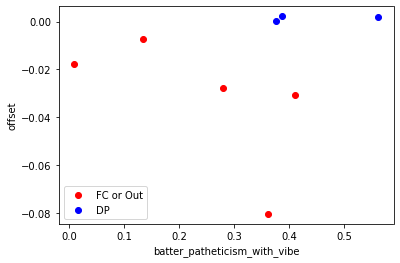

In [ ]:
dfc["offset"] = dfc["roll2"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]
print(len(outliers))

fig, ax = plt.subplots(1, facecolor='white')
x_val = "batter_patheticism_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="FC or Out",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="DP",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [ ]:
table = outliers
print(len(table))
#table = table[table['event_type'] == 'Out']
table[
    [
        "season",
        "day",
        "offset",
        "roll",
        "threshold_rounded",
        "event_type",
        "out_count",
        #"baserunner_count",
        #"top_of_inning",
        # "inning",
        # "home_score",
        # "away_score",
        #"event_type",
        #"ballpark_filthiness",
        # "pitcher_name",
        "fielder_name",
        # "batter_name",
        "runner_on_second_name",
        "weather",
        # "batter_mods",
        # "pitcher_mods",
        "fielder_mods",
        "runner_on_second_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=True)
# len(table)

8


,season,day,offset,roll,threshold_rounded,event_type,out_count,fielder_name,runner_on_second_name,weather,fielder_mods,runner_on_second_mods,batting_team_mods,pitching_team_mods,game_id,play_count
1316,14,75,-0.080388,"[0.8857634629614795, 0.5922806732854278]",0.672668,Stay,1,Bates Bentley,Squid Galvanic,Weather.FEEDBACK,NaN,NaN,CARCINIZATION;UNHOLEY,SINKING_SHIP,53e9c83e-5320-461a-a1bc-4a947edfaeff,153
1150,14,34,-0.030832,"[0.3019054356528097, 0.44060238883460134]",0.471435,Stay,1,Yurts Buttercup,Gita Sparrow,Weather.FLOODING,NaN,REVERBERATING,NaN,UNDERSEA,054d7359-66f4-4823-bed0-d46cf20795a1,402
452,13,8,-0.027788,"[0.3364479230953836, 0.5174872276132079]",0.545275,Stay,0,Reese Clark,Erin Jesaulenko,Weather.BIRDS,FIRE_EATER,NaN,UNDERSEA,NaN,4066bcc5-c90b-4a44-b1ef-ed77b89c8e2f,293
1144,14,34,-0.017738,"[0.38513572333804125, 0.7146749176778393]",0.732413,Stay,1,Slosh Truk,Swamuel Mora,Weather.FLOODING,NaN,NaN,NaN,UNDERSEA,054d7359-66f4-4823-bed0-d46cf20795a1,198
986,13,87,-0.007314,"[0.17210730360647286, 0.6765636830896982]",0.683878,Stay,0,Mira Lemma,Theodore Duende,Weather.FEEDBACK,NaN,SPICY,PARTY_TIME,MAINTENANCE_MODE;PARTY_TIME,6d973af8-cb51-4fe1-a99e-e5e84b512e2c,65
1258,14,44,0.000339,"[0.49458259127442705, 0.5922763718005204]",0.591937,Advance,1,Basilio Mason,Erin Jesaulenko,Weather.FLOODING,NaN,NaN,UNDERSEA,SUN_KISSED;SUN2_PAYOUTS,0ea06764-620a-45c1-8a92-788fe8808f55,251
1261,14,44,0.001771,"[0.126202548416537, 0.6062171104103038]",0.604446,Advance,1,Jan Canberra,Ra- M-son,Weather.FLOODING,NaN,SCATTERED,SUN_KISSED;SUN2_PAYOUTS,UNDERSEA,0ea06764-620a-45c1-8a92-788fe8808f55,308
1275,14,46,0.002160,"[0.27459597306231287, 0.8049869218468009]",0.802827,Advance,1,Baby Triumphant,Mcd-well Mason,Weather.SALMON,REVERBERATING,SCATTERED,SUN_KISSED;SUN2_PAYOUTS,NaN,2267b3ab-ed32-432f-9848-a0202eda494c,31


In [ ]:
list(df.columns)

['event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'runner_on_first_base_thirst',
 'runner_on_first_continuation',
 'runner_on_first_ground_friction',
 'runner_on_first_indulgence',
 'runner_on_first_laserlikeness',
 'runner_on_first_multiplier',
 'runner_on_second_base_thirst',
 'runner_on_second_continuation',
 'runner_on_second_ground_friction',
 'runner_on_second_indulgence',
 'runne